In [1]:
from config_figures import *

In [91]:
df = pd.read_csv(google_drive_path + '/sdm_stats_validation.csv').drop(['.geo'], axis=1).rename(columns = {'system:index': 'species'}).sort_values('nobs', ascending=False)
df['nobs_cat'] = ['at least 90' if x >= 90 else 'less than 90' for x in df['nobs']] #pd.cut(df['nobs'], bins=[0, 89, 10000])
df

,species,auc,f1,nobs,npa,precision,prevalence,recall,threshold,tss,nobs_cat
19150,Quercus_nigra,0.963269,0.943622,10000.0,10000.0,0.905502,0.500000,0.985109,0.474747,0.882417,at least 90
17234,Picea_abies,0.959332,0.917980,10000.0,10000.0,0.872929,0.500000,0.967965,0.484848,0.827291,at least 90
17442,Pinus_strobus,0.972258,0.937016,10000.0,9917.0,0.910082,0.502084,0.965636,0.535354,0.869569,at least 90
17443,Pinus_sylvestris,0.973223,0.944125,10000.0,9956.0,0.920544,0.501102,0.968951,0.575758,0.884808,at least 90
580,Acer_platanoides,0.972122,0.937584,10000.0,10000.0,0.913158,0.500000,0.963383,0.545455,0.871766,at least 90
...,...,...,...,...,...,...,...,...,...,...,...
7138,Dimorphanthera_macbainii,0.696231,0.121316,20.0,5000.0,0.073856,0.003984,0.407407,0.010101,0.388752,less than 90
7139,Dimorphanthera_robbinsii,0.775575,0.197736,20.0,5000.0,0.122774,0.003984,0.563889,0.010101,0.546764,less than 90
18634,Psidium_robustum,0.843815,0.387085,20.0,5000.0,0.279441,0.003984,0.692593,0.010101,0.684620,less than 90
12418,Lacmellea_standleyi,0.548554,0.095238,20.0,5000.0,0.092593,0.003984,0.108333,0.030303,0.103822,less than 90


In [92]:
df[df['nobs'] >= 90]['precision'].mean()

0.3412047942476762

In [93]:
df_melt = pd.melt(df, id_vars=['species', 'nobs', 'nobs_cat'] , value_vars=['tss','precision','recall'], var_name='metric')
df_melt

,species,nobs,nobs_cat,metric,value
0,Quercus_nigra,10000.0,at least 90,tss,0.882417
1,Picea_abies,10000.0,at least 90,tss,0.827291
2,Pinus_strobus,10000.0,at least 90,tss,0.869569
3,Pinus_sylvestris,10000.0,at least 90,tss,0.884808
4,Acer_platanoides,10000.0,at least 90,tss,0.871766
...,...,...,...,...,...
72415,Dimorphanthera_macbainii,20.0,less than 90,recall,0.407407
72416,Dimorphanthera_robbinsii,20.0,less than 90,recall,0.563889
72417,Psidium_robustum,20.0,less than 90,recall,0.692593
72418,Lacmellea_standleyi,20.0,less than 90,recall,0.108333


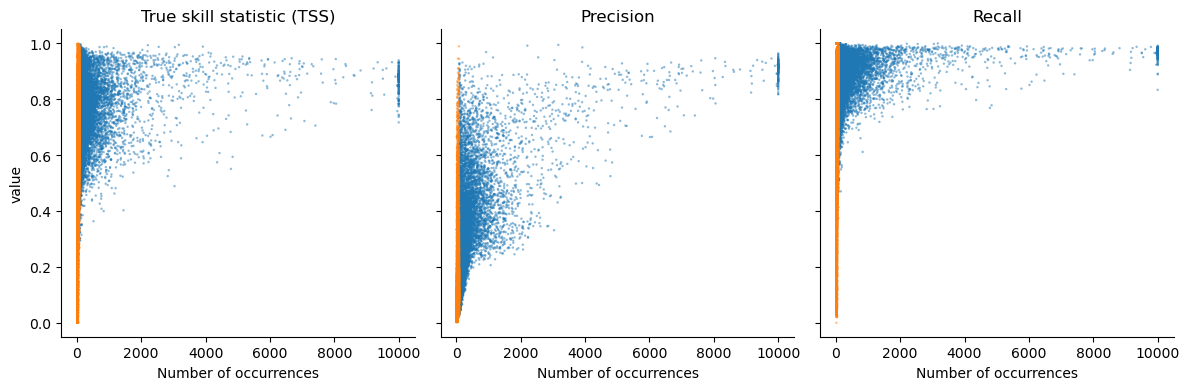

In [101]:
g = sns.relplot(df_melt, x='nobs', y='value', hue='nobs_cat', col='metric', s=3, alpha=0.5, edgecolor="none", height=4, legend=False)
g.set_titles(col_template="{col_name}")
g.set(xlabel='Number of occurrences')
g.axes[0,0].set_title('True skill statistic (TSS)')
g.axes[0,1].set_title('Precision')
g.axes[0,2].set_title('Recall')
plt.savefig('../figures/nobs_tss_precision_recall.png') 

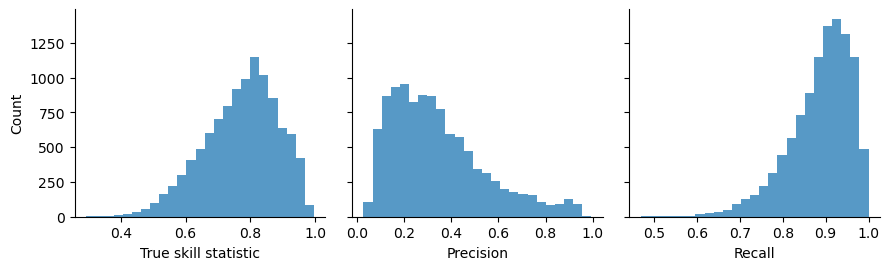

In [69]:
g = sns.FacetGrid(df_melt[df_melt['nobs'] >= 90], col="metric", sharex=False)
g.map(sns.histplot, 'value', bins = 25, edgecolor=None)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('True skill statistic')
g.axes[0,1].set_xlabel('Precision')
g.axes[0,2].set_xlabel('Recall')
plt.savefig('../figures/tss_precision_recall.png')

In [41]:
df_splot = pd.read_csv(google_drive_path + '/sdm_splot_comparison.csv').drop(['system:index', '.geo'], axis=1)
df_splot = df_splot.merge(df[['species','nobs','Number of occurrences']], on='species')
df_splot['tss'] = (df_splot['tp'] / (df_splot['tp'] + df_splot['fn'])) + (df_splot['tn'] / (df_splot['tn'] + df_splot['fp'])) - 1
df_splot['precision'] = df_splot['tp'] / (df_splot['tp'] + df_splot['fp'])
df_splot['recall'] = df_splot['tp'] / (df_splot['tp'] + df_splot['fn'])
df_splot['f1'] = (2 * df_splot['precision'] * df_splot['recall']) / (df_splot['precision'] + df_splot['recall'])
df_splot

,fn,fp,species,tn,tp,nobs,Number of occurrences,tss,precision,recall,f1
0,3,307,Abarema_barbouriana,953,0,175.0,"(89, 10000]",-0.243651,0.000000,0.000000,NaN
1,3,252,Abarema_jupunba,2651,3,781.0,"(89, 10000]",0.413193,0.011765,0.500000,0.022989
2,4,141,Abarema_laeta,836,1,200.0,"(89, 10000]",0.055681,0.007042,0.200000,0.013605
3,0,1153,Abarema_langsdorffii,697,63,174.0,"(89, 10000]",0.376757,0.051809,1.000000,0.098514
4,117,13214,Abies_alba,14342,1845,10000.0,"(89, 10000]",0.460834,0.122518,0.940367,0.216791
...,...,...,...,...,...,...,...,...,...,...,...
5934,7,186,Ziziphus_spina-christi,4634,5,930.0,"(89, 10000]",0.378077,0.026178,0.416667,0.049261
5935,0,969,Zollernia_ilicifolia,876,97,341.0,"(89, 10000]",0.474797,0.090994,1.000000,0.166810
5936,0,48,Zuelania_guidonia,5148,0,440.0,"(89, 10000]",NaN,0.000000,NaN,NaN
5937,0,496,Zygia_coccinea,531,1,249.0,"(89, 10000]",0.517040,0.002012,1.000000,0.004016


In [70]:
tmp = df_splot[df_splot[['fn','tp']].sum(axis=1) > 5]
tmp

,fn,fp,species,tn,tp,nobs,Number of occurrences,tss,precision,recall,f1
1,3,252,Abarema_jupunba,2651,3,781.0,"(89, 10000]",0.413193,0.011765,0.500000,0.022989
3,0,1153,Abarema_langsdorffii,697,63,174.0,"(89, 10000]",0.376757,0.051809,1.000000,0.098514
4,117,13214,Abies_alba,14342,1845,10000.0,"(89, 10000]",0.460834,0.122518,0.940367,0.216791
5,1,104,Abies_amabilis,13555,38,2528.0,"(89, 10000]",0.966745,0.267606,0.974359,0.419890
6,10,63,Abies_balsamea,17130,119,10000.0,"(89, 10000]",0.918816,0.653846,0.922481,0.765273
...,...,...,...,...,...,...,...,...,...,...,...
5931,20,1068,Ziziphus_mucronata,3400,76,894.0,"(89, 10000]",0.552634,0.066434,0.791667,0.122581
5932,24,21,Ziziphus_nummularia,1491,0,120.0,"(89, 10000]",-0.013889,0.000000,0.000000,NaN
5933,5,953,Ziziphus_oenopolia,4387,29,274.0,"(89, 10000]",0.674477,0.029532,0.852941,0.057087
5934,7,186,Ziziphus_spina-christi,4634,5,930.0,"(89, 10000]",0.378077,0.026178,0.416667,0.049261


In [104]:
tmp['tss'].std()

0.3044893370204291

In [71]:
df_splot_melt = pd.melt(tmp, id_vars=['species','nobs','Number of occurrences'], value_vars=['tss','precision','recall'], var_name='metric')
df_splot_melt['which'] = 'splot_comparison'
df_splot_melt

,species,nobs,Number of occurrences,metric,value,which
0,Abarema_jupunba,781.0,"(89, 10000]",tss,0.413193,splot_comparison
1,Abarema_langsdorffii,174.0,"(89, 10000]",tss,0.376757,splot_comparison
2,Abies_alba,10000.0,"(89, 10000]",tss,0.460834,splot_comparison
3,Abies_amabilis,2528.0,"(89, 10000]",tss,0.966745,splot_comparison
4,Abies_balsamea,10000.0,"(89, 10000]",tss,0.918816,splot_comparison
...,...,...,...,...,...,...
10054,Ziziphus_mucronata,894.0,"(89, 10000]",recall,0.791667,splot_comparison
10055,Ziziphus_nummularia,120.0,"(89, 10000]",recall,0.000000,splot_comparison
10056,Ziziphus_oenopolia,274.0,"(89, 10000]",recall,0.852941,splot_comparison
10057,Ziziphus_spina-christi,930.0,"(89, 10000]",recall,0.416667,splot_comparison


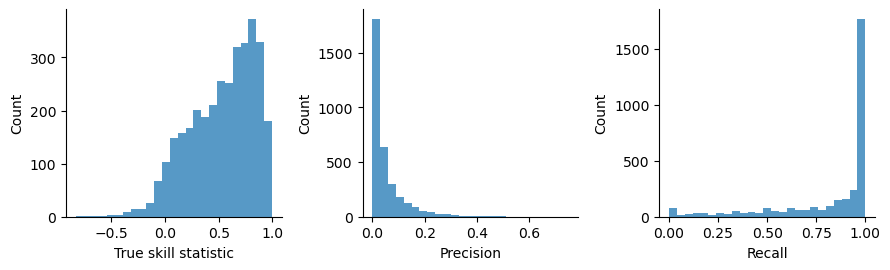

In [72]:
g = sns.FacetGrid(df_splot_melt, col="metric", sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins = 25, edgecolor=None)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('True skill statistic')
g.axes[0,1].set_xlabel('Precision')
g.axes[0,2].set_xlabel('Recall')
plt.savefig('../figures/splot_tss_precision_recall.png')